# Plot For roboust and label efficiency

In [31]:
import pandas as pd
import pandas as pd
from pathlib import Path
from config import *
from ppp_prediction.plot.utils import save_fig
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# setting global font as calibri
plt.rcParams["font.family"] = "Calibri"

Figure5Dir = FigureDir / "Figure5"
Figure5Dir.mkdir(exist_ok=True, parents=True)
SuppFig7Dir = FigureDir / "SuppFig7"
SuppFig7Dir.mkdir(exist_ok=True, parents=True)

hue_pallete_dict = {
    "Ummae": "#DC6F6B",
    "SwinLarge": "#F6C88B",
    "ResNet18": "#7EB9D7",
}

In [5]:
ICC_res_df = pd.read_feather(RawDataDir / "ICC_res.feather")
ICC_res_df["Model"] = pd.Categorical(
    ICC_res_df["Model"], categories=["Ummae", "SwinLarge", "ResNet18"], ordered=True
)
ICC_res_df["Center"] = pd.Categorical(
    ICC_res_df["Center"],
    categories=["AZ-TR", "AZ-EV1", "AZ-EV2", "DX-EV"],
    ordered=True,
)

## Figure5
### Figure5a

/tmp/ipykernel_1862994/3104649708.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


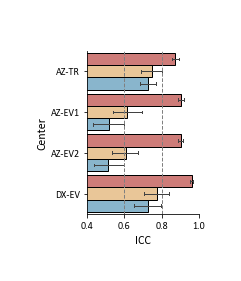

In [7]:
fig, ax = plt.subplots(figsize=(2, 3))
sns.barplot(
    data=ICC_res_df,
    y="Center",
    x="Mean ICC",
    hue="Model",
    # ci="sd",
    palette=hue_pallete_dict,
    dodge=True,
    edgecolor="black",
    alpha=1,
    lw=1,
    ax=ax,
    width=0.9,
    # err_kws={},
    capsize=0.2,
    err_kws={"linewidth": 1},
    legend=False,
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# for container in ax.containers:
#     ax.bar_label(container, label_type="edge", fontsize=10, fmt="{:.2f}")
ax.set_ylabel("Center", fontsize=12)
ax.set_xlabel("ICC", fontsize=12)
# ax.set_title("ICC", fontsize=14)
ax.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=7,
    fontsize=12,
)
ax.set_xlim(0.4, 1.0)
ax.axvline(0.8, ls="--", color="grey", lw=1)
ax.axvline(0.6, ls="--", color="grey", lw=1)

save_fig(fig, Figure5Dir / "Figure5A", dpi=default_dpi)

### Figure 5b

In [8]:
# 1) qt_df
metrics_qt_df = pd.read_feather(RawDataDir / "metrics_qt.feather")
# add system annotations
System_mapping_df = pd.concat(
    [
        pd.DataFrame(System_traits_map[k])
        .rename(columns={0: "Biomarker Code"})
        .assign(System=k)
        for k in System_traits_map.keys()
    ]
)

ICC_res_df_system = ICC_res_df.merge(
    System_mapping_df,
    left_on="Feature",
    right_on="Biomarker Code",
)
ICC_res_df_system

,Type,Mean ICC,Std ICC,95% CI Lower,95% CI Upper,p_value,Feature,Model,Center,Biomarker Code,System
0,ICC2,0.839304,0.015064,0.829967,0.848641,0.0,AG,Ummae,AZ-TR,AG,Digestive
1,ICC2,0.784405,0.010651,0.777803,0.791006,0.0,AG,Ummae,AZ-EV1,AG,Digestive
2,ICC2,0.791546,0.006360,0.787604,0.795488,0.0,AG,Ummae,AZ-EV2,AG,Digestive
3,ICC2,0.922997,0.007143,0.918569,0.927424,0.0,AG,Ummae,DX-EV,AG,Digestive
4,ICC2,0.670795,0.018415,0.659382,0.682208,0.0,AG,ResNet18,AZ-TR,AG,Digestive
...,...,...,...,...,...,...,...,...,...,...,...
775,ICC2,0.985757,0.001351,0.984919,0.986594,0.0,Age,ResNet18,DX-EV,Age,Anthropometrics
776,ICC2,0.966576,0.003570,0.964363,0.968789,0.0,Age,SwinLarge,AZ-TR,Age,Anthropometrics
777,ICC2,0.970789,0.000998,0.970171,0.971408,0.0,Age,SwinLarge,AZ-EV1,Age,Anthropometrics
778,ICC2,0.972211,0.001033,0.971571,0.972852,0.0,Age,SwinLarge,AZ-EV2,Age,Anthropometrics


In [11]:
ICC_res_df_system["System"].unique()

array(['Digestive', 'Hematology', 'Anthropometrics', 'Cardiovascular',
       'Immune', 'Electrolytes', 'Renal', 'Endocrine'], dtype=object)

In [13]:
ICC_res_df_system["System"] = pd.Categorical(
    ICC_res_df_system["System"],
    categories=[
        "Anthropometrics",
        "Digestive",
        "Hematology",
        "Cardiovascular",
        "Immune",
        "Electrolytes",
        "Renal",
        "Endocrine",
    ],
    ordered=True,
)

/tmp/ipykernel_1862994/4159104876.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


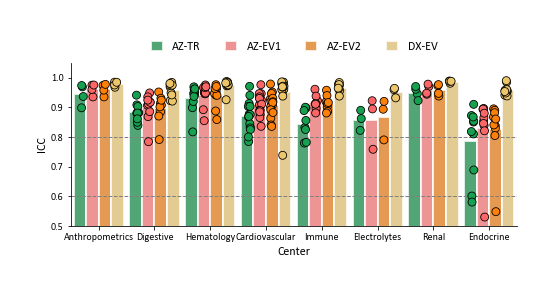

In [15]:
fig, ax = plt.subplots(figsize=(8, 3))
Center_color_dict = {
    "AZ-TR": "#16A150",
    "AZ-EV1": "#FC6666",
    "AZ-EV2": "#FD8008",
    "DX-EV": "#EDC66A",
}

# Center_color_list = [
#         '#FC6666',"#16A150",'#FD8008', '#999999'

# ]
sns.barplot(
    data=ICC_res_df_system.query("Model =='Ummae'"),
    x="System",
    y="Mean ICC",
    hue="Center",
    ci=None,
    palette=Center_color_dict,
    dodge=True,
    edgecolor="white",
    alpha=0.8,
    lw=2,
    ax=ax,
    width=0.9,
)

sns.stripplot(
    data=ICC_res_df_system.query("Model =='Ummae'"),
    x="System",
    y="Mean ICC",
    hue="Center",
    ax=ax,
    dodge=True,
    palette=Center_color_dict,
    # hue_order=order,
    # ax=ax,
    size=8,
    edgecolor="k",  # 可选：加边框
    linewidth=0.8,
    alpha=1,
    legend=False,
)


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# for container in ax.containers:
#     ax.bar_label(container, label_type="edge", fontsize=10, fmt="{:.2f}")
ax.set_xlabel("Center", fontsize=12)
ax.set_ylabel("ICC", fontsize=12)
# ax.set_title("ICC", fontsize=14)
ax.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=7,
    fontsize=12,
)
ax.axhline(y=0.8, color="grey", ls="--", lw=1)
ax.axhline(y=0.6, color="grey", ls="--", lw=1)

ax.set_ylim(0.5, 1.05)

save_fig(fig, Figure5Dir / "Figure5b", dpi=default_dpi)

### Figure5c-f

In [16]:
totalDataDict = pd.read_pickle(RawDataDir / "totalDataDict.pkl")

In [17]:
from ppp_prediction.plot.utils import save_fig

# plt_data
plt_data_list = []
colors = list(sns.color_palette("Set2", 4).as_hex())
to_show = ["HDLC"]
for i, tgt in enumerate(to_show):
    for center in [
        "AZ-TR",
        "AZ-EV1",
        "AZ-EV2",
        "DX-EV",
    ]:
        model = "Ummae"
        tgt_model = f"{tgt}_{model}"
        plt_data = totalDataDict["Ummae"].query("DataSetName == @center").copy()
        multi_eid = plt_data["eid"].value_counts().loc[lambda x: x > 1].index.tolist()

        if tgt_model not in plt_data.columns:
            continue
        ThisICCDir = FigureDir / f"Figure4/{center}/{tgt}"
        ThisICCDir.mkdir(parents=True, exist_ok=True)

        res_df_need = (
            (
                plt_data[["eid", tgt_model]]
                .query("eid in @multi_eid")
                .groupby("eid")
                .apply(
                    lambda x: x.sample(n=2, random_state=1)
                    .reset_index(drop=True)
                    .reset_index()
                )
            )
            .reset_index(drop=True)
            .pivot(index="eid", columns="index", values=tgt_model)
        )
        res_df_need.columns = ["Test1", "Test2"]
        res_df_need["Delta"] = res_df_need["Test2"] - res_df_need["Test1"]
        res_df_need["Mean"] = (res_df_need["Test2"] + res_df_need["Test1"]) / 2
        res_df_need = res_df_need.merge(
            plt_data[["eid", tgt]].drop_duplicates().set_index("eid"),
            left_index=True,
            right_index=True,
        )
        res_df_need["Center"] = center
        res_df_need["Trait"] = tgt
        plt_data_list.append(res_df_need.rename(columns={tgt: "Real Value"}))
    #     break
    # break

# from ridgeplot import ridgeplot

format_data = pd.concat(plt_data_list)
format_data

,Test1,Test2,Delta,Mean,Real Value,Center,Trait
eid,,,,,,,
00299c21cbaafb82dea6deefaffbd3b3,0.986024,0.990576,0.004552,0.988300,1.38,AZ-TR,HDLC
00411460f7c92d2124a67ea0f4cb5f85,0.959100,0.938289,-0.020811,0.948695,0.70,AZ-TR,HDLC
00494b8a054a33de725a244dd1fdc9ec,1.171629,1.241735,0.070106,1.206682,1.32,AZ-TR,HDLC
00526f9f7aadfd7c17d6cc1b144a74c6,0.934257,0.928534,-0.005723,0.931396,1.41,AZ-TR,HDLC
00613fce3874c2b8e46713a579cd7927,1.245377,1.142559,-0.102818,1.193968,1.20,AZ-TR,HDLC
...,...,...,...,...,...,...,...
fe73855720140766aef47f71fe84e24b,1.314052,1.320816,0.006763,1.317434,1.18,DX-EV,HDLC
fe74cf5d214858f602408c12c7916afe,1.442168,1.402888,-0.039280,1.422528,1.42,DX-EV,HDLC
fe9eca08e151c83edf145bc5fee2b41c,1.142819,1.147924,0.005105,1.145372,0.99,DX-EV,HDLC


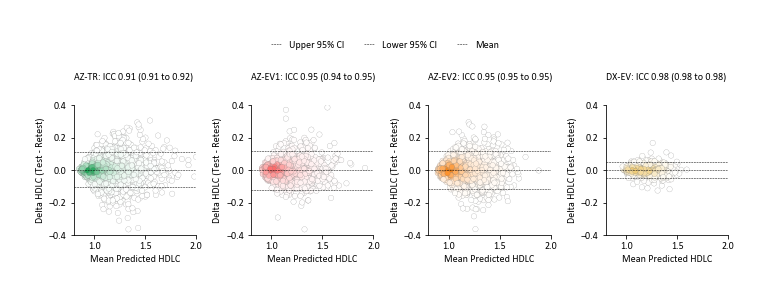

In [19]:
import matplotlib.colors as mcolors

from scipy import stats
import numpy as np

tgt = "HDLC"

Center_color_dict = {
    "AZ-TR": "#16A150",
    "AZ-EV1": "#FC6666",
    "AZ-EV2": "#FD8008",
    "DX-EV": "#EDC66A",
}

fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharey=False)
for idx, center in enumerate(Center_color_dict.keys()):
    ax = axes[idx]
    texts = ""
    exract_df = ICC_res_df.query(
        f"Feature == '{tgt}' and Model == 'Ummae' and Center ==@center"
    )
    for idx, row in exract_df.iterrows():
        texts += f"{row['Center']}: ICC {row['Mean ICC']:.2f} ({row['95% CI Lower']:.2f} to {row['95% CI Upper']:.2f})\n"
    plt_data = format_data.query("Center == @center and Trait == @tgt")
    std_plt_data = plt_data["Delta"].std()
    mean_plt_data = plt_data["Delta"].mean()
    # turn std => se
    uplim = 1.96 * std_plt_data + mean_plt_data
    lowlim = -1.96 * std_plt_data + mean_plt_data

    ax.axhline(y=uplim, color="black", linestyle="--", label="Upper 95% CI")
    ax.axhline(y=lowlim, color="black", linestyle="--", label="Lower 95% CI")
    ax.axhline(y=mean_plt_data, color="black", linestyle="--", label="Mean")

    cmap = mcolors.LinearSegmentedColormap.from_list(
        name="my",
        colors=[
            # "#337bb7",
            Center_color_dict[center],
            "white",
        ][::-1],
    )

    values = np.vstack([plt_data["Mean"], plt_data["Delta"]])
    kernel = stats.gaussian_kde(values, bw_method="silverman")(values)
    # kernel += np.quantile(kernel, 0.1)
    kernel += 2
    # print(kernel)

    norm = mcolors.TwoSlopeNorm(
        vmin=np.min(kernel), vcenter=np.median(kernel), vmax=np.max(kernel) * 20
    )
    # kernel.min(), vcenter=kernel.median(), vmax=kernel.max())
    sns.scatterplot(
        x="Mean",
        y="Delta",
        data=plt_data,
        # color =Center_color_dict[center],
        # hue="Delta",
        c=kernel,
        # palette=cmap,
        # cmap = 'RdBu_r',
        # cmap = 'Greens',
        cmap=cmap,
        hue_norm=norm,
        s=30,
        alpha=1,
        edgecolor="grey",
        linewidth=0.2,
        # palette=["#cd4366", "#95ccce", "#d2e5e3", "#f0dde3"],
        ax=ax,
        zorder=0,
        legend=False,
    )

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    ax.set_xlabel(f"Mean Predicted {tgt}")
    ax.set_ylabel(f"Delta {tgt} (Test - Retest)")
    # sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=4, title=None)
    ax.text(0, 1.1, texts, transform=ax.transAxes, ha="left", va="bottom")
    if idx != 0:
        # ax.set_title(tgt)
        # remove legend
        ax.legend().remove()

    ax.set_xlim(0.8, 2)
    ax.set_ylim(-0.4, 0.4)
# ax.set_title(tgt)
fig.tight_layout()

# copy ax legend to fig legend
handles, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(
    handles=handles,
    labels=labels,
    loc="lower center",
    bbox_to_anchor=(0.5, 1, 0, 1),
    bbox_transform=fig.transFigure,
    ncol=12,
)

save_fig(fig, Figure5Dir / "Figure5cf", dpi=default_dpi)

### Figure 5g

In [26]:
hue_pallete_dict = {
    "Ummae": "#b2182e",
    "ResNet18": "#5c9fcc",
    "SwinLarge": "#f5b56b",
}
centers = ["AZ-TR", "AZ-EV1", "AZ-EV2", "AZTZ-EV", "DX-EV"]

In [27]:
qt_df = pd.read_feather(RawDataDir / "label_efficiency_qt.feather")
traits_used = qt_df["Trait"].unique().tolist()
traits_used

['AG',
 'ALP',
 'ALT',
 'APTT',
 'AST',
 'Age',
 'Alb',
 'BMI',
 'BNP',
 'C1q',
 'CK',
 'CK-MB',
 'Cl',
 'Cr',
 'D-Bil',
 'D-Dimer',
 'FBG',
 'FFA',
 'FT3',
 'FT4',
 'GGT',
 'Glu',
 'HCT',
 'HDLC',
 'Hb',
 'HbA1C%',
 'Hcy',
 'Height',
 'INR',
 'Isn',
 'K',
 'LDH',
 'LDLC',
 'LPa',
 'LYM',
 'LYM%',
 'MCH',
 'MCHC',
 'MCV',
 'MPV',
 'NE',
 'NE%',
 'Na',
 'PCT',
 'PLT',
 'RBC',
 'Sex',
 'T-Bil',
 'T3',
 'T4',
 'TC',
 'TG',
 'TP',
 'TSH',
 'UA',
 'Urea',
 'WBC',
 'Weight',
 'eGFR(CKD-EPI)',
 'hs-CRP',
 'hsTnI',
 'nonHDL',
 'sdLDL']

In [28]:
totalDataDict = pd.read_pickle(RawDataDir / "totalDataDict.pkl")
tb1_df2 = (
    totalDataDict["Ummae"]
    .query("DataSetName == 'AZ-TR'")[["eid", "type", *traits_used]]
    .drop_duplicates()
)
need_counts = (~tb1_df2.query("type == 'train'")[[*traits_used]].isna()).sum().to_dict()
need_counts

{'AG': 3163,
 'ALP': 3163,
 'ALT': 3167,
 'APTT': 3233,
 'AST': 3167,
 'Age': 3287,
 'Alb': 3167,
 'BMI': 2740,
 'BNP': 3194,
 'C1q': 2611,
 'CK': 3199,
 'CK-MB': 3215,
 'Cl': 3170,
 'Cr': 3169,
 'D-Bil': 3163,
 'D-Dimer': 3234,
 'FBG': 3233,
 'FFA': 2618,
 'FT3': 2484,
 'FT4': 2486,
 'GGT': 3163,
 'Glu': 3170,
 'HCT': 2822,
 'HDLC': 3210,
 'Hb': 2822,
 'HbA1C%': 3036,
 'Hcy': 3163,
 'Height': 2739,
 'INR': 3233,
 'Isn': 1017,
 'K': 3170,
 'LDH': 3201,
 'LDLC': 3210,
 'LPa': 2548,
 'LYM': 2822,
 'LYM%': 1076,
 'MCH': 2822,
 'MCHC': 2822,
 'MCV': 2822,
 'MPV': 2821,
 'NE': 2822,
 'NE%': 2822,
 'Na': 648,
 'PCT': 2821,
 'PLT': 2822,
 'RBC': 2822,
 'Sex': 3287,
 'T-Bil': 3163,
 'T3': 2493,
 'T4': 2492,
 'TC': 3210,
 'TG': 3210,
 'TP': 3163,
 'TSH': 2492,
 'UA': 3169,
 'Urea': 3169,
 'WBC': 2822,
 'Weight': 2832,
 'eGFR(CKD-EPI)': 3169,
 'hs-CRP': 3115,
 'hsTnI': 3228,
 'nonHDL': 3210,
 'sdLDL': 2618}

In [29]:
qt_df["Training_Sample_Size"] = qt_df.apply(
    lambda row: int(need_counts[row["Trait"]] * row["Ratio"]), axis=1
)
print(f"Training_Sample_Size max: {qt_df['Training_Sample_Size'].max()}")

bins = [0, 400, 800, 1600, 3300]  # as max is 3287
labels = [400, 800, 1600, 3200]
qt_df["Training_Sample_Size_bin"] = pd.cut(
    qt_df["Training_Sample_Size"], bins=bins, labels=labels
)
qt_df

Training_Sample_Size max: 3287


,Model,Trait,Center,N,Ratio,spearmanr,pearsonr,p_adj,pvalue,R2,...,R2_UCI,R2 (95% CI),spearmanr_LCI,spearmanr_UCI,spearmanr (95% CI),pearsonr_LCI,pearsonr_UCI,pearsonr (95% CI),Training_Sample_Size,Training_Sample_Size_bin
0,ResNet18,AG,AZ-EV1,1498,0.2,-0.085819,0.023535,NaN,3.664222e-01,0.000554,...,0.002979,"0.001 (-0.002, 0.003)",NaN,NaN,None,NaN,NaN,None,632,800
1,ResNet18,AG,AZ-EV1,1498,0.1,-0.114163,0.006294,NaN,8.091697e-01,0.000040,...,0.000689,"0.000 (-0.001, 0.001)",NaN,NaN,None,NaN,NaN,None,316,400
2,ResNet18,AG,AZ-EV1,1498,0.5,-0.023961,0.003503,NaN,8.930760e-01,0.000012,...,0.000373,"0.000 (-0.000, 0.000)",NaN,NaN,None,NaN,NaN,None,1581,1600
3,ResNet18,ALP,AZ-EV1,1498,0.5,0.028192,0.098794,NaN,7.606305e-04,0.009760,...,0.019847,"0.010 (-0.000, 0.020)",NaN,NaN,None,NaN,NaN,None,1581,1600
4,ResNet18,ALP,AZ-EV1,1498,0.1,0.042453,0.082222,NaN,5.145877e-03,0.006760,...,0.015181,"0.007 (-0.002, 0.015)",NaN,NaN,None,NaN,NaN,None,316,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,Ummae,Urea,DX-EV,895,1.0,0.189554,0.193474,1.176252e-08,3.793449e-09,0.037432,...,0.062235,"0.037 (0.013, 0.062)",0.133096,0.235492,"0.190 (0.133, 0.235)",0.167554,0.252996,"0.193 (0.168, 0.253)",3169,3200
3662,Ummae,WBC,DX-EV,893,1.0,0.148479,0.139583,5.568552e-05,2.579895e-05,0.019483,...,0.037732,"0.019 (0.001, 0.038)",0.102851,0.191618,"0.148 (0.103, 0.192)",0.085855,0.168623,"0.140 (0.086, 0.169)",2822,3200
3663,Ummae,Weight,DX-EV,800,1.0,0.682028,0.676797,2.055708e-147,1.063724e-148,0.458055,...,0.509700,"0.458 (0.406, 0.510)",0.653147,0.719780,"0.682 (0.653, 0.720)",0.629848,0.738134,"0.677 (0.630, 0.738)",2832,3200
3664,Ummae,eGFR(CKD-EPI),DX-EV,895,1.0,0.474502,0.428795,1.041746e-44,1.153317e-45,0.183865,...,0.230473,"0.184 (0.137, 0.230)",0.444578,0.515038,"0.475 (0.445, 0.515)",0.391157,0.480555,"0.429 (0.391, 0.481)",3169,3200


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


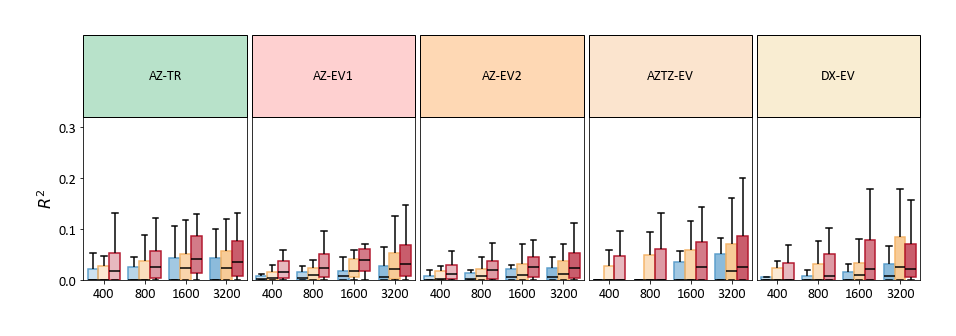

In [30]:
import numpy as np
from ppp_prediction.plot.utils import hex_to_rgba

Center_color_dict = {
    "AZ-TR": "#16A150",
    "AZ-EV1": "#FC6666",
    "AZ-EV2": "#FD8008",
    "AZTZ-EV": "#F4A75F",
    "DX-EV": "#EDC66A",
}
import itertools

plt_data = qt_df.copy()
plt_data["Center"] = pd.Categorical(plt_data["Center"], categories=centers)
plt_data.loc[plt_data.query("pvalue > 0.05").index, "R2"] = 0
plt_data["R2"] = plt_data["R2"].fillna(0)


width_ratios = [
    subdata["Training_Sample_Size_bin"].nunique()
    for _, subdata in qt_df.groupby("Center")
]
fig, axes = plt.subplots(
    1,
    plt_data["Center"].nunique(),
    # figsize=(sum(width_ratios) * 0.8, 3),
    figsize=(15, 3),
    sharey=True,
    gridspec_kw={"width_ratios": width_ratios, "wspace": 0.03},
)
for idx, (system, system_df) in enumerate(plt_data.groupby("Center")):

    ax = axes[idx]
    # set order of x

    sns.boxplot(
        x="Training_Sample_Size_bin",
        y="R2",
        data=system_df,
        ax=ax,
        # order=centers,
        hue="Model",
        palette=hue_pallete_dict,
        # close outlier
        fliersize=0,
        # set box alpha
        saturation=1.5,
        linecolor="black",
        linewidth=1.5,
    )

    unique_ratios = system_df["Training_Sample_Size_bin"].unique()
    num_ratios = len(unique_ratios)

    # # 透明度渐变（从低到高）
    alphas = np.linspace(0.3, 0.7, num_ratios)
    patches = ax.patches
    for i, patch in enumerate(patches):
        model_idx = i % num_ratios  # 在每个x位置内的hue索引
        alpha = alphas[model_idx]
        color = patch.get_facecolor()[:3]
        patch.set_facecolor((*color, alpha))
        patch.set_edgecolor(color)

    # lines = [line for line in ax.lines if line.get_linestyle() != "None"]

    # for line in box_lines:
    #     line.set_color('black')
    #     line.set_linewidth(1.3)

    ax.set_xlabel("")

    if idx != 0:
        ax.tick_params(axis="y", which="both", left=False, labelleft=False)
        ax.set_ylabel("")
    else:

        ax.set_ylabel(r"$R^2$", fontsize=16)
        plt.setp(ax.get_yticklabels(), rotation=0, fontsize=14)

    from matplotlib.patches import Rectangle
    import textwrap

    # 添加顶端灰色标题块
    facecolor = hex_to_rgba(Center_color_dict[system], 0.3)
    # set alpha of facecolor as 0.5

    rect = Rectangle(
        (0, 1.0),
        1.0,
        0.5,
        transform=ax.transAxes,
        # facecolor="#d9d9d9",
        facecolor=facecolor,
        edgecolor="black",
        lw=1,
        clip_on=False,
        zorder=5,
    )
    ax.add_patch(rect)

    # 垂直写标题（在灰色块中）
    ax.text(
        0.5,
        1.25,
        "\n".join(textwrap.wrap(system, width=15)),
        ha="center",
        va="center",
        rotation=0,
        fontsize=14,
        fontweight="bold",
        transform=ax.transAxes,
        zorder=99,
    )

    ax.legend().set_visible(False)
    plt.setp(ax.get_xticklabels(), rotation=0, fontsize=14)
    # ax.set_yticks([0.05, 0.1, 0.15,0.2,0.25, 0.3, 0.35])
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
    # add grid
    # ax.grid(axis="y", linestyle="--", linewidth=1, alpha=0.4)

    # set xticklabels

    ax.set_ylim([0, 0.32])
save_fig(fig, Figure5Dir / "Figure5g", dpi=default_dpi)

## Supplementary Figure 7

/tmp/ipykernel_1862994/62485814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1862994/62485814.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

/tmp/ipykernel_1862994/62485814.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

/tmp/ipykernel_1862994/62485814.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/tmp/ipykernel_1862994/62485814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

SwinLarge
0.1
SwinLarge
0.19799518522372841
SwinLarge
0.6260208115179634


/tmp/ipykernel_1862994/62485814.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/tmp/ipykernel_1862994/62485814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1862994/62485814.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

/tmp/ipykernel_1862994/62485814.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

/tmp/ipykernel_1862994/62485814.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a f

SwinLarge
0.1
SwinLarge
0.2752792525151866
ResNet18
0.5961671394166681


/tmp/ipykernel_1862994/62485814.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


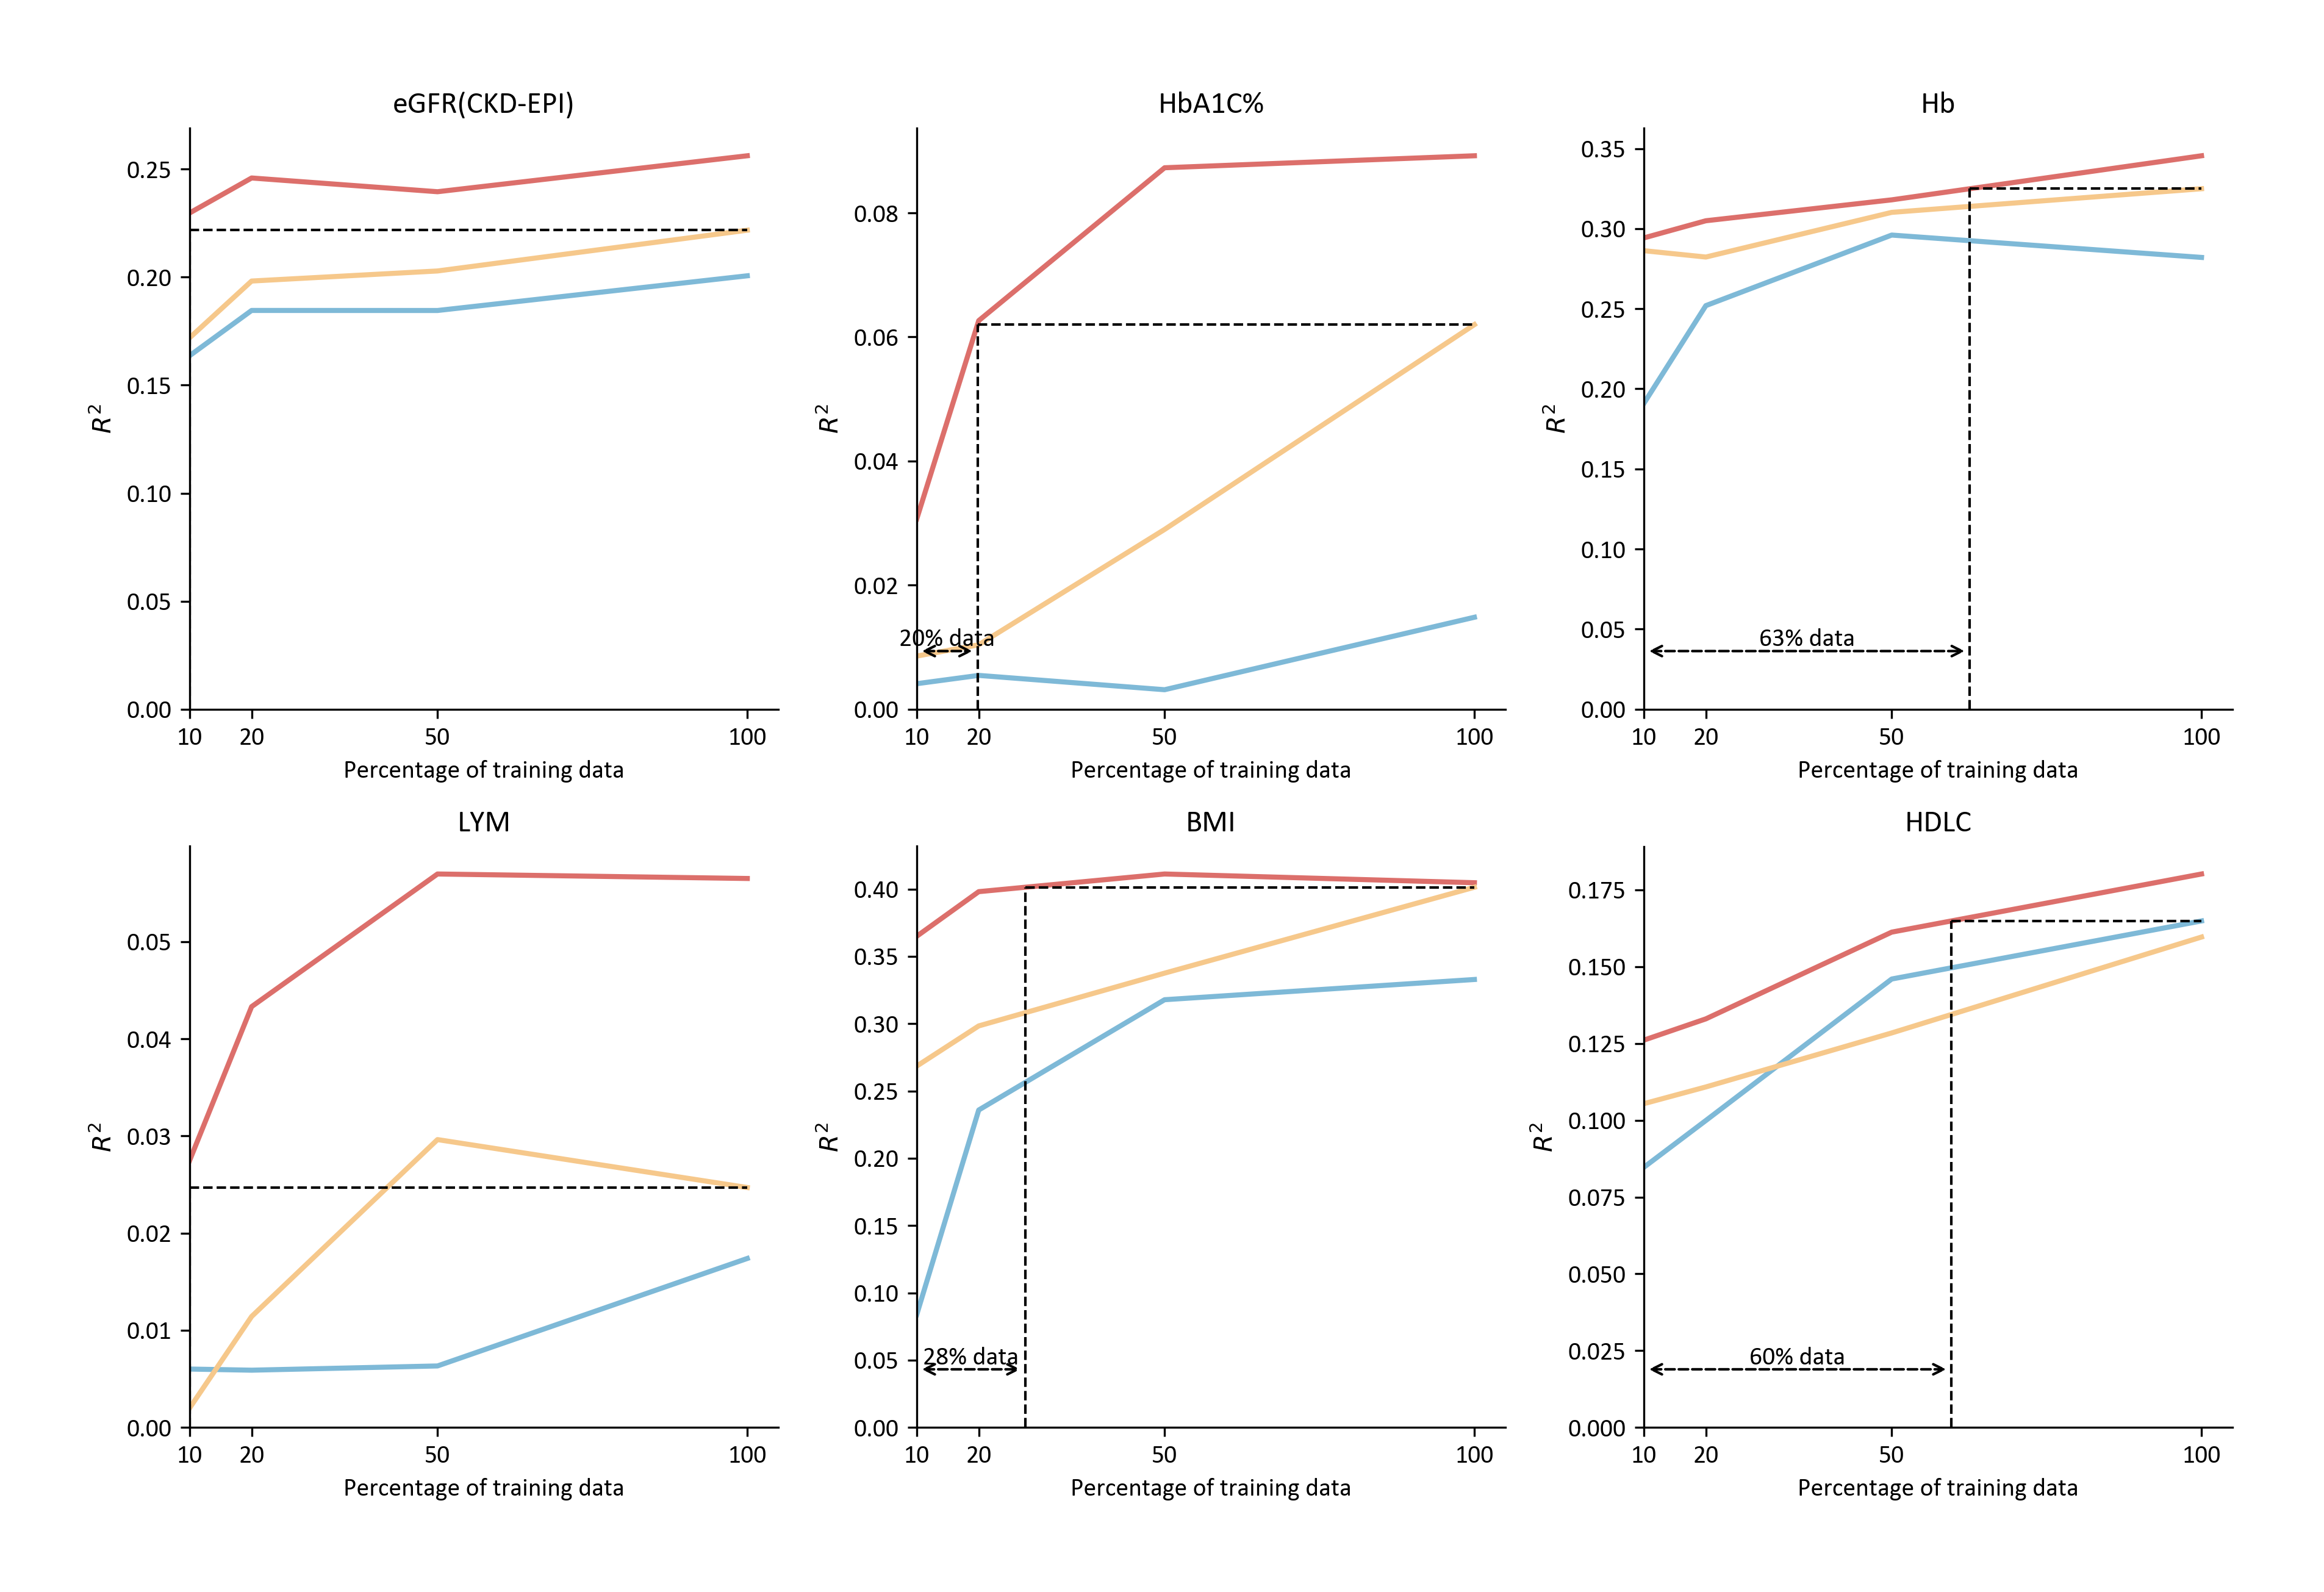

In [35]:
# for plot_trait in qt_df.Trait.unique():
fig, axes = plt.subplots(2, 3, figsize=(12, 8), dpi=300)
for i, plot_trait in enumerate(["eGFR(CKD-EPI)", "HbA1C%", "Hb", "LYM", "BMI", "HDLC"]):

    plot_traits = [plot_trait]
    plt_data = qt_df.query("Trait in @plot_traits")
    plt_data["Center"] = pd.Categorical(plt_data["Center"], categories=centers)
    # fig,ax = plt.subplots(figsize=(4, 4),dpi=300)
    ax = axes.flatten()[i]

    # plot
    l1 = sns.lineplot(
        data=plt_data.query("Model == 'Ummae'"),
        x="Ratio",
        y="R2",
        hue="Model",
        palette=hue_pallete_dict,
        lw=2,
        ax=ax,
        ci=None,
    )
    l2 = sns.lineplot(
        data=plt_data.query("Model != 'Ummae'"),
        x="Ratio",
        y="R2",
        hue="Model",
        palette=hue_pallete_dict,
        lw=2,
        ax=ax,
        ci=None,
    )
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    secondary_best_model = (
        plt_data.query("Ratio ==1 and Model != 'Ummae'")
        .groupby("Model")
        .mean()
        .sort_values("R2", ascending=False)
        .index.tolist()[0]
    )
    print(secondary_best_model)
    secondary_best_row_y = plt_data.query(
        f"Model == '{secondary_best_model}' and Ratio == 1"
    )["R2"].mean()

    # query position of Ummae at y == secondary_best_row_y
    # get line from l1
    # get x and y from line

    line = l1.get_lines()[0]  # 第一条折线
    x_data, y_data = line.get_data()
    x0 = np.interp(secondary_best_row_y, y_data, x_data)
    print(x0)
    ax.vlines(
        x=x0, ymin=0, ymax=secondary_best_row_y, color="black", linestyle="--", lw=1
    )
    # ax.axvline(x=1, color='black', linestyle='--', lw=1)
    ax.hlines(
        y=secondary_best_row_y, xmin=x0, xmax=1, color="black", linestyle="--", lw=1
    )
    if secondary_best_row_y < y_data[0]:
        pass
    else:
        # annotate text with arrow (left to right)
        y_abs_loc = 0.1 * ax.get_ylim()[1]
        start = (0.1, y_abs_loc)
        end = (x0, y_abs_loc)
        # 绘制双向箭头
        ax.annotate(
            f"",
            xy=end,
            xytext=start,
            arrowprops=dict(arrowstyle="<->", lw=1, color="black", linestyle="--"),
            # transform = ax.transAxes,
            #  xycoords='axes fraction',
            annotation_clip=False,
        )
        ax.text((x0 + 0.1) / 2, y_abs_loc, f"{x0:.0%} data", ha="center", va="bottom")

    # move legend to top
    # sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=3)
    # remove legend
    ax.get_legend().remove()
    ax.set_xlim(0.1, 1.05)
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.set_xticks([0.1, 0.2, 0.5, 1])
    ax.set_xticklabels([10, 20, 50, 100])

    ax.set_xlabel("Percentage of training data")
    ax.set_ylabel(r"$R^2$")
    ax.set_title(plot_trait)
fig.tight_layout()

save_fig(fig, SuppFig7Dir / f"SuppFig7", dpi=default_dpi)